# Ex04 - Filtragem de Imagens

Nesta atividade vamos entender a operação de convolução e o uso da mesma para filtragem de imagens. Testaremos o uso de **filtros suavizantes**, usados para a remoção de ruído, e **filtros aguçantes**, usados para detecção de bordas.  

- **Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

- **Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Alguns dos filtros aguçantes comuns são: Filtro de Sobel, Filtro de Prewitt, Filtro Laplaciano.



In [ ]:
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)
your_private_repo = "Disciplinas-FEEC/EA979-2023S1" #@param {"type": "string"}

addr = f"git@github.com:{your_private_repo}.git"
!git clone $addr

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf
from scipy.ndimage import convolve
import os
from google.colab import drive 
drive.mount('/content/gdrive')
path = "EA979-2023S1/exercicios/Ex04_imagens/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


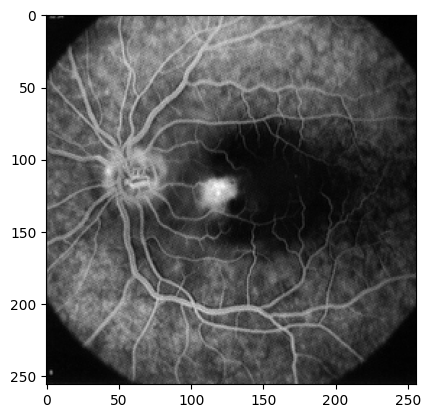

In [ ]:

%matplotlib inline
f = mpimg.imread(path+'retina.tif')  
plt.imshow(f,cmap='gray')

**ATENÇÃO** - as operações de filtragem alteram os valores e eles podem sair da faixa de 0 a 255. Portanto, fique atento à maneira como você está realizando as operações e visualizando os resultados. Algumas dicas:

- Uma boa prática é realizar as operações em ponto flutuante;
- Quando a visualização não corresponde ao esperado, desconfie que os valores sairam da escala e que os valores, de alguma maneira, estão sendo truncados;

## Exercício 4.1 - Operação de convolução e filtro da média

Entenda o uso da operação de convolução e experimente usá-la para entender o filtro da média. Siga o seguinte roteiro:
- crie uma imagem numérica pequena (7x7, por exemplo), crie um filtro de média (máscara 3x3) e use a função da biblioteca scipy (scipy.ndimage.convolve) para realizar a filtragem. Você precisará importar a biblioteca usando *from scipy.ndimage import convolve*,mas não é preciso instalar nada. Verifique numericamente que a filtragem esteja correta;
- repita a operação de filtragem com a mesma máscara da média e a de convolução na imagem da retina;
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes;
- varie também o modos da função - '*reflect*', '*constant*', '*nearest*', '*mirror*', '*wrap*'- explicando as diferenças encontradas. Dica, você só conseguirá visualizar as diferenças se aumentar o tamanho da máscara (filtro);

In [ ]:
# Imagem numérica 7x7 com valores entre 0 e 9
 
#a = np.random.randint(10, size=(7,7))
a = 9*np.ones((7,7))
a[1,4] = 0
print(a)

[[9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 0. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9.]]


Agora, criaremos um filtro de média 3x3

In [ ]:
# Filtro de média 3x3
h = 1/9*(np.ones((3,3)))
print(h)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
from scipy.ndimage import convolve

In [ ]:
# Testes com diferentes tipos de tratamento de borda
# a_filt = skf.edges.convolve(a,h)
a_filt = convolve(a,h,mode='constant',cval=0)
# a_filt = skf.edges.convolve(a,h,mode='nearest')
print(a_filt)

[[4. 6. 6. 5. 5. 5. 4.]
 [6. 9. 9. 8. 8. 8. 6.]
 [6. 9. 9. 8. 8. 8. 6.]
 [6. 9. 9. 9. 9. 9. 6.]
 [6. 9. 9. 9. 9. 9. 6.]
 [6. 9. 9. 9. 9. 9. 6.]
 [4. 6. 6. 6. 6. 6. 4.]]


Agora vamos realizar a mesma operação de filtragem pela média, mas usando a imagem da retina. Vamos também usar máscaras de média de tamanhos diferentes.

Text(0.5, 1.0, 'h:19x19')

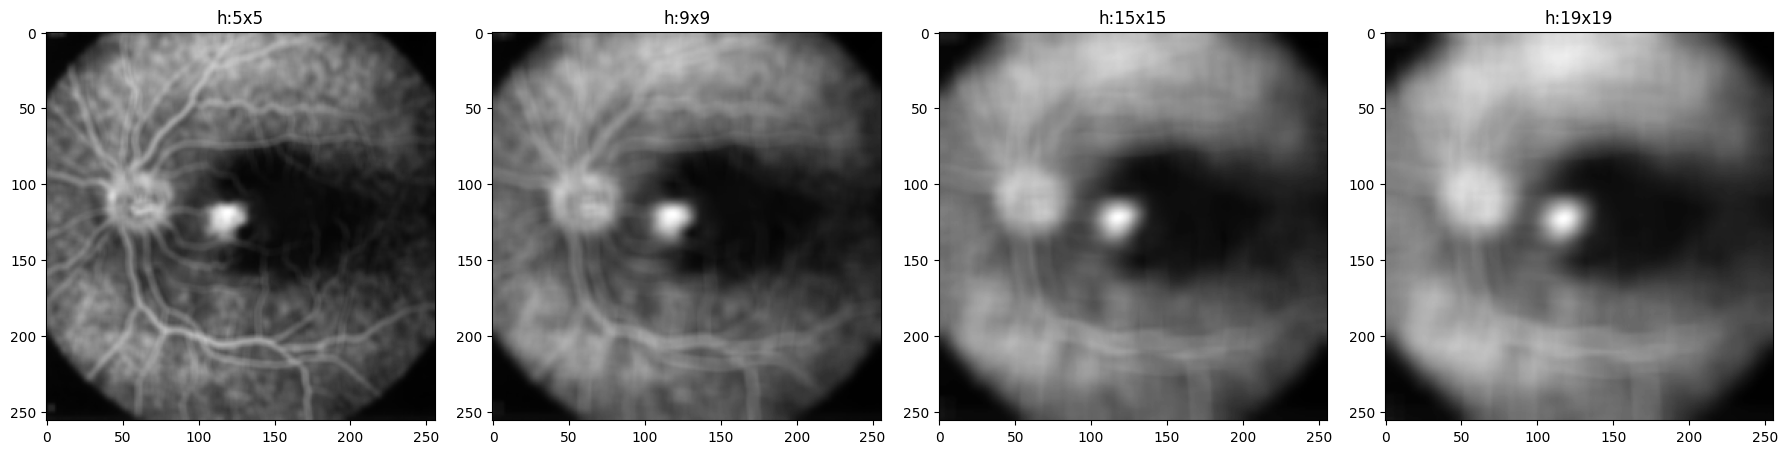

In [ ]:
# Criando máscaras da média de diversos tamanhos
H1 = (1/(5*5))*(np.ones((5,5)))
H2 = (1/(9*9))*(np.ones((9,9)))
H3 = (1/(15*15))*(np.ones((15,15)))
H4 = (1/(19*19))*(np.ones((19,19)))

# Filtrando as imagens com as diversas máscara
f_filt_H1 = convolve(f,H1)
f_filt_H2 = convolve(f,H2)
f_filt_H3 = convolve(f,H3)
f_filt_H4 = convolve(f,H4)


fig, axs = plt.subplots(1,4, figsize=(18, 10))
plt.tight_layout() 

plt.subplot(141)
plt.imshow(f_filt_H1, cmap='gray')
plt.title('h:5x5')
plt.subplot(142)
plt.imshow(f_filt_H2, cmap='gray')
plt.title('h:9x9')
plt.subplot(143)
plt.imshow(f_filt_H3, cmap='gray')
plt.title('h:15x15')
plt.subplot(144)
plt.imshow(f_filt_H4, cmap='gray')
plt.title('h:19x19')

À medida que a máscara aumenta, percebe-se que o borramento também. Enquanto que com filtragem da máscara 5x5 ainda se vê todos os vasos da retina, com filtragem da máscara 19x19, praticamente só se vê a pupila. Este tipo de filtragem com uma máscara tão grande, pode ser útil, por exemplo, para nos livrarmos dos vasos, se estamos apenas interessados na pupila.

A partir da máscara 5x5 Agora vamos comparar os modos de tratamento de borda da função de convolução, usando 2 máscaras de média, uma pequena (3x3) e uma maior (21x21).

Text(0.5, 1.0, 'h:21x21, wrap')

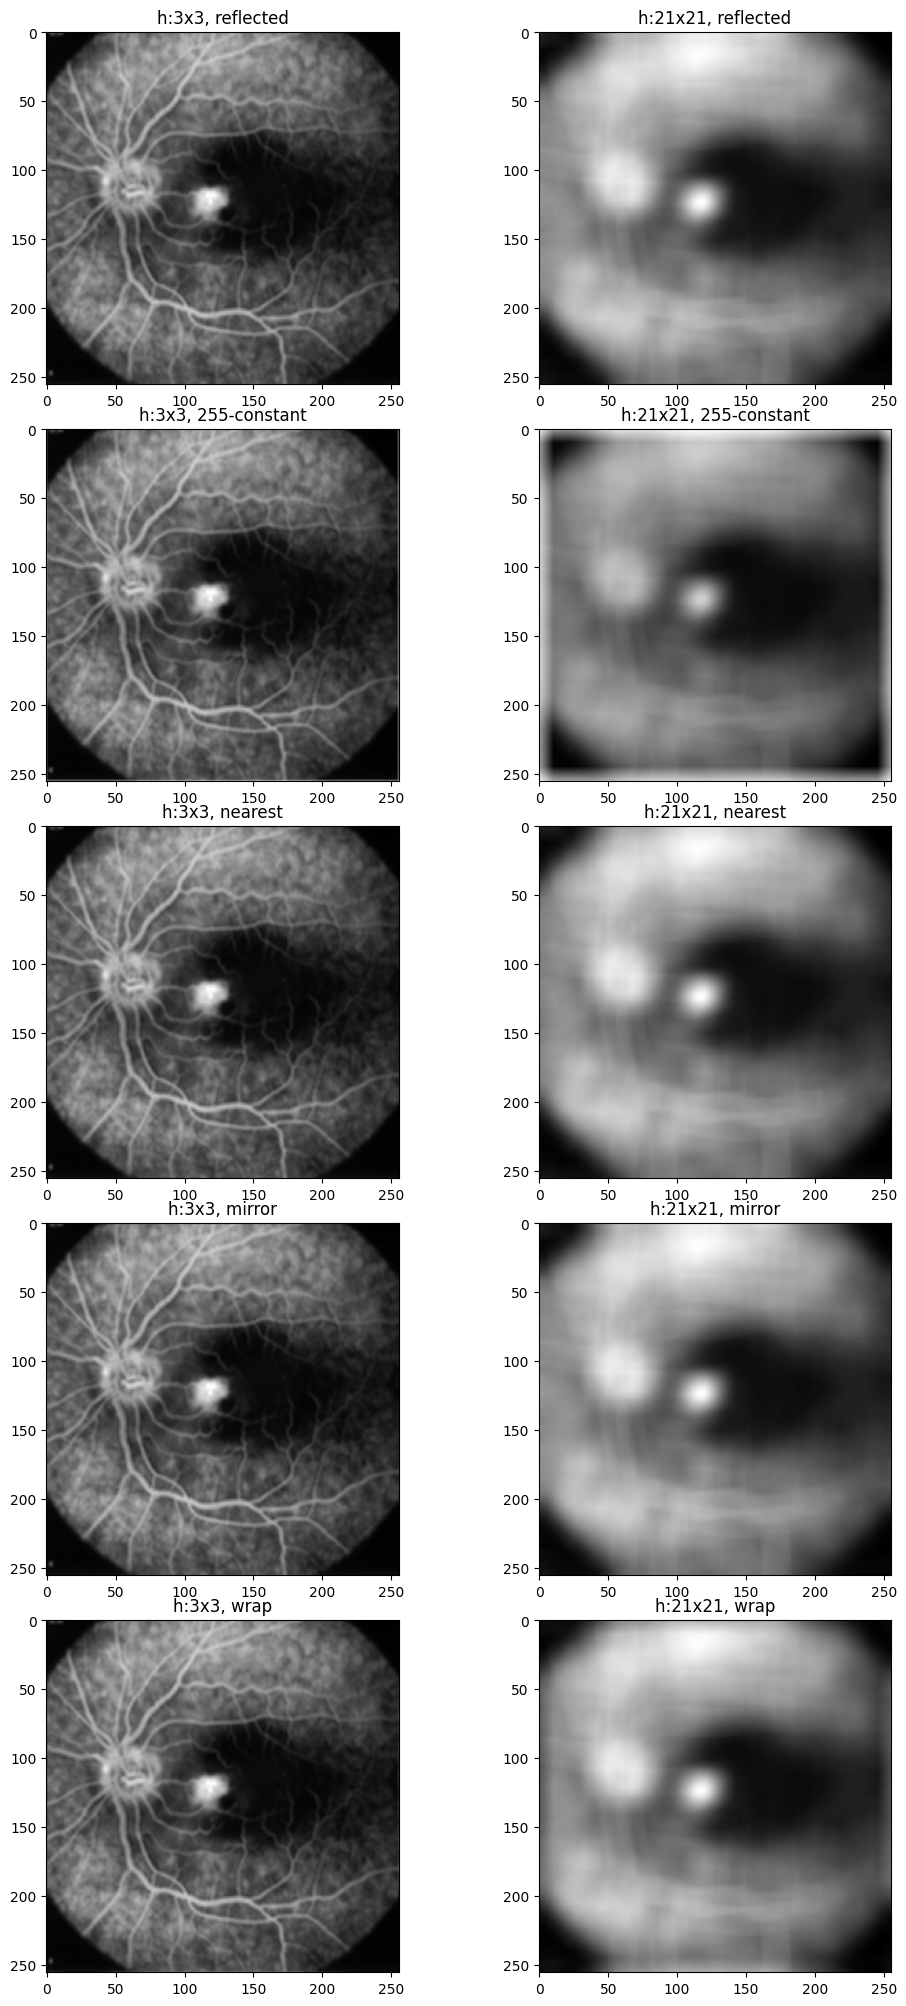

In [ ]:
# Criando uma máscara da média de tamanho 21x21
h2 = (1/(21*21))*(np.ones((21,21)))

# Filtrando as imagens com a máscara 3x3, variando o tratamento de borda
f_filt = convolve(f,h)
f_filt2 = convolve(f,h,mode='constant',cval=255)
f_filt3 = convolve(f,h,mode='nearest')
f_filt4 = convolve(f,h,mode='mirror')
f_filt5 = convolve(f,h,mode='wrap')

# Filtrando as imagens com a máscara 21x21, variando o tratamento de borda
f_filt6 = convolve(f,h2)
f_filt7 = convolve(f,h2,mode='constant',cval=255)
f_filt8 = convolve(f,h2,mode='nearest')
f_filt9 = convolve(f,h2,mode='mirror')
f_filt10 = convolve(f,h2,mode='wrap')

fig, axs = plt.subplots(5,2, figsize=(10, 20))
plt.tight_layout() 

plt.subplot(521)
plt.imshow(f_filt, cmap='gray')
plt.title('h:3x3, reflected')
plt.subplot(523)
plt.imshow(f_filt2, cmap='gray')
plt.title('h:3x3, 255-constant')
plt.subplot(525)
plt.imshow(f_filt3, cmap='gray')
plt.title('h:3x3, nearest')
plt.subplot(527)
plt.imshow(f_filt4, cmap='gray')
plt.title('h:3x3, mirror')
plt.subplot(529)
plt.imshow(f_filt5, cmap='gray')
plt.title('h:3x3, wrap')

plt.subplot(522)
plt.imshow(f_filt6,cmap='gray')
plt.title('h:21x21, reflected')
plt.subplot(524)
plt.imshow(f_filt7,cmap='gray')
plt.title('h:21x21, 255-constant')
plt.subplot(526)
plt.imshow(f_filt8, cmap='gray')
plt.title('h:21x21, nearest')
plt.subplot(528)
plt.imshow(f_filt9, cmap='gray')
plt.title('h:21x21, mirror')
plt.subplot(5,2,10)
plt.imshow(f_filt10, cmap='gray')
plt.title('h:21x21, wrap')

Algumas observações sobre os modos de tratamento de bordas:
1. usando filtros pequenos, não se percebe o efeito de bordas
2. os modos *reflect*, *mirror* e *nearest* não causam efeito de borda perceptível, mesmo usando máscaras grandes
3. os modos *constant* e *wrap* resultam em um efeito de borda mais perceptível.

## Exercício 4.2 - Filtro gaussiano e redução de ruído

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3);
- adicione ruído gaussiano à imagem da retina (sugestão: use np.random) e depois tente remover o ruído com o filtro gaussiano. Você pode aumentar o filtro gaussiano se quiser. Comente seu resultado. 

Gerando a Gaussiana 1D (horizontal)

In [ ]:
# Gaussiana 1D (horizontal)
x = np.array([-1, 0, 1])
sigma= 1.0
mu = 0.0
gh = np.exp(-( (x-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("1D Gaussian-like array:")
print(gh)

1D Gaussian-like array:
[0.60653066 1.         0.60653066]


Gerando a Gaussiana 1D (vertical)

In [ ]:
# Gaussiana 1D (vertical)

y = np.array([[-1],[0],[1]])
sigma= 1.0
mu = 0.0
gv = np.exp(-( (y-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("1D Gaussian-like array:")
print(gv)

1D Gaussian-like array:
[[0.60653066]
 [1.        ]
 [0.60653066]]


Gerando a Gaussiana 2D pela multiplicação das máscaras horizontal e vertical

In [ ]:
# Gaussiana 2D (horizontal x vertical)
g = gv*gh
print(g)

[[0.36787944 0.60653066 0.36787944]
 [0.60653066 1.         0.60653066]
 [0.36787944 0.60653066 0.36787944]]


Gerando a Gaussaiana 2D diretamente, para poder comparar.

In [ ]:
# Gaussiana 2D (direta)
x, y = np.meshgrid(np.linspace(-1,1,3), np.linspace(-1,1,3))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("2D Gaussian-like array:")
print(g)


2D Gaussian-like array:
[[0.36787944 0.60653066 0.36787944]
 [0.60653066 1.         0.60653066]
 [0.36787944 0.60653066 0.36787944]]


Adicionando ruído à imagem usando a função *np.random.random*

In [ ]:
f

array([[14, 18, 40, ...,  7,  7,  6],
       [ 8,  8, 27, ...,  1,  2,  2],
       [10, 14, 41, ...,  3,  4,  4],
       ...,
       [12, 12, 14, ...,  8, 10,  6],
       [14, 14, 13, ..., 11, 11,  9],
       [21, 25, 23, ..., 16, 14, 16]], dtype=uint8)

In [ ]:
f+20*np.random.random(f.shape)

array([[19.48915819, 18.11840777, 44.6681819 , ..., 16.24281348,
        25.33000698, 12.90479667],
       [18.76280098, 11.79928766, 28.60692298, ...,  6.50959387,
        10.06164979, 18.74404172],
       [16.49599211, 28.56009431, 51.98591629, ..., 13.54017297,
        18.90532708,  9.83970377],
       ...,
       [23.28442775, 19.85155923, 24.75200507, ..., 13.17007357,
        29.61607681, 18.34845466],
       [23.74427425, 23.34298798, 29.54902065, ..., 22.45704202,
        21.25988511, 17.11424984],
       [38.69445945, 42.11077169, 24.67014556, ..., 16.13967121,
        32.16046319, 21.09731839]])

In [ ]:
f+0.4*f.std()*np.random.random(f.shape)

array([[14.05768878, 31.08541135, 51.1258558 , ..., 24.36352249,
        19.96801244, 21.9747035 ],
       [19.52321892, 23.28019873, 30.12228513, ...,  6.86835679,
        17.86245692, 14.91193318],
       [20.55064717, 21.84706888, 56.01507368, ...,  5.10263878,
        10.72940662,  6.50275771],
       ...,
       [28.00199842, 12.39364096, 22.31276502, ..., 16.11479345,
        22.34613172, 11.19437184],
       [25.63385961, 20.66824377, 13.66128641, ..., 21.80919392,
        18.62076476, 25.12051358],
       [30.69608171, 35.44098102, 29.04868106, ..., 27.33499246,
        27.76395716, 23.04502114]])

In [ ]:
f+np.random.normal(f.mean(), f.std(), size=f.shape)

array([[131.75754055, 120.56137059, 133.47242652, ..., 121.23164727,
        146.71084155,  40.98836411],
       [ 74.24857639,  39.64527275,  64.59797405, ..., 128.17781526,
         88.64204363, 101.55882449],
       [ 52.02708465,  90.70586452, 170.56686333, ..., 120.00204715,
         54.76322052,  96.6530893 ],
       ...,
       [  7.48050613, 108.68173275,  85.07541633, ...,  76.82091836,
        108.80556711,  65.08801127],
       [116.2147908 ,  23.4467042 ,  25.80502435, ..., -41.19906304,
        137.96061759, 100.98677818],
       [155.98640827,  96.33124093, 116.01294286, ..., 149.3510092 ,
         56.75495273,  21.41795485]])

In [ ]:
f + 0.2*np.random.normal(f.mean(), f.std(), size=f.shape)

array([[27.8242225 , 41.82876795, 61.97134478, ..., 28.57830686,
        21.54460382, 19.25377077],
       [27.235875  , 22.42682561, 37.83932438, ..., 14.49236885,
        27.29543257, 24.86923186],
       [22.63228219, 31.16809811, 46.99103055, ..., 22.09033626,
        14.62801894,  9.45214101],
       ...,
       [27.84919725, 21.57959726, 37.69247376, ..., 16.84838816,
        23.03079125, 28.09638067],
       [34.35000579, 38.55501523, 26.58491035, ..., 24.26864707,
        24.04147286, 33.5096666 ],
       [31.98344409, 34.52160501, 30.92803888, ..., 37.35280468,
        17.24720314, 32.57262053]])

In [ ]:
f + 0.01*np.random.normal(f.mean(), f.std(), size=f.shape)

array([[15.35165752, 18.86701411, 40.54933297, ...,  8.39089657,
         7.51376351,  7.23305922],
       [ 8.00141653,  9.33640344, 27.45296596, ...,  1.73265406,
         2.80396609,  3.61413639],
       [10.59741882, 15.13225544, 41.51051164, ...,  3.96228932,
         5.59735233,  4.83775098],
       ...,
       [12.902585  , 13.05101218, 15.49825349, ...,  8.93326488,
        10.92850589,  6.61099255],
       [14.13824647, 14.2339272 , 13.84074867, ..., 11.42549592,
        11.61021542,  9.4329901 ],
       [20.80473873, 26.38295761, 23.32345001, ..., 16.30749496,
        15.22491577, 17.1177715 ]])

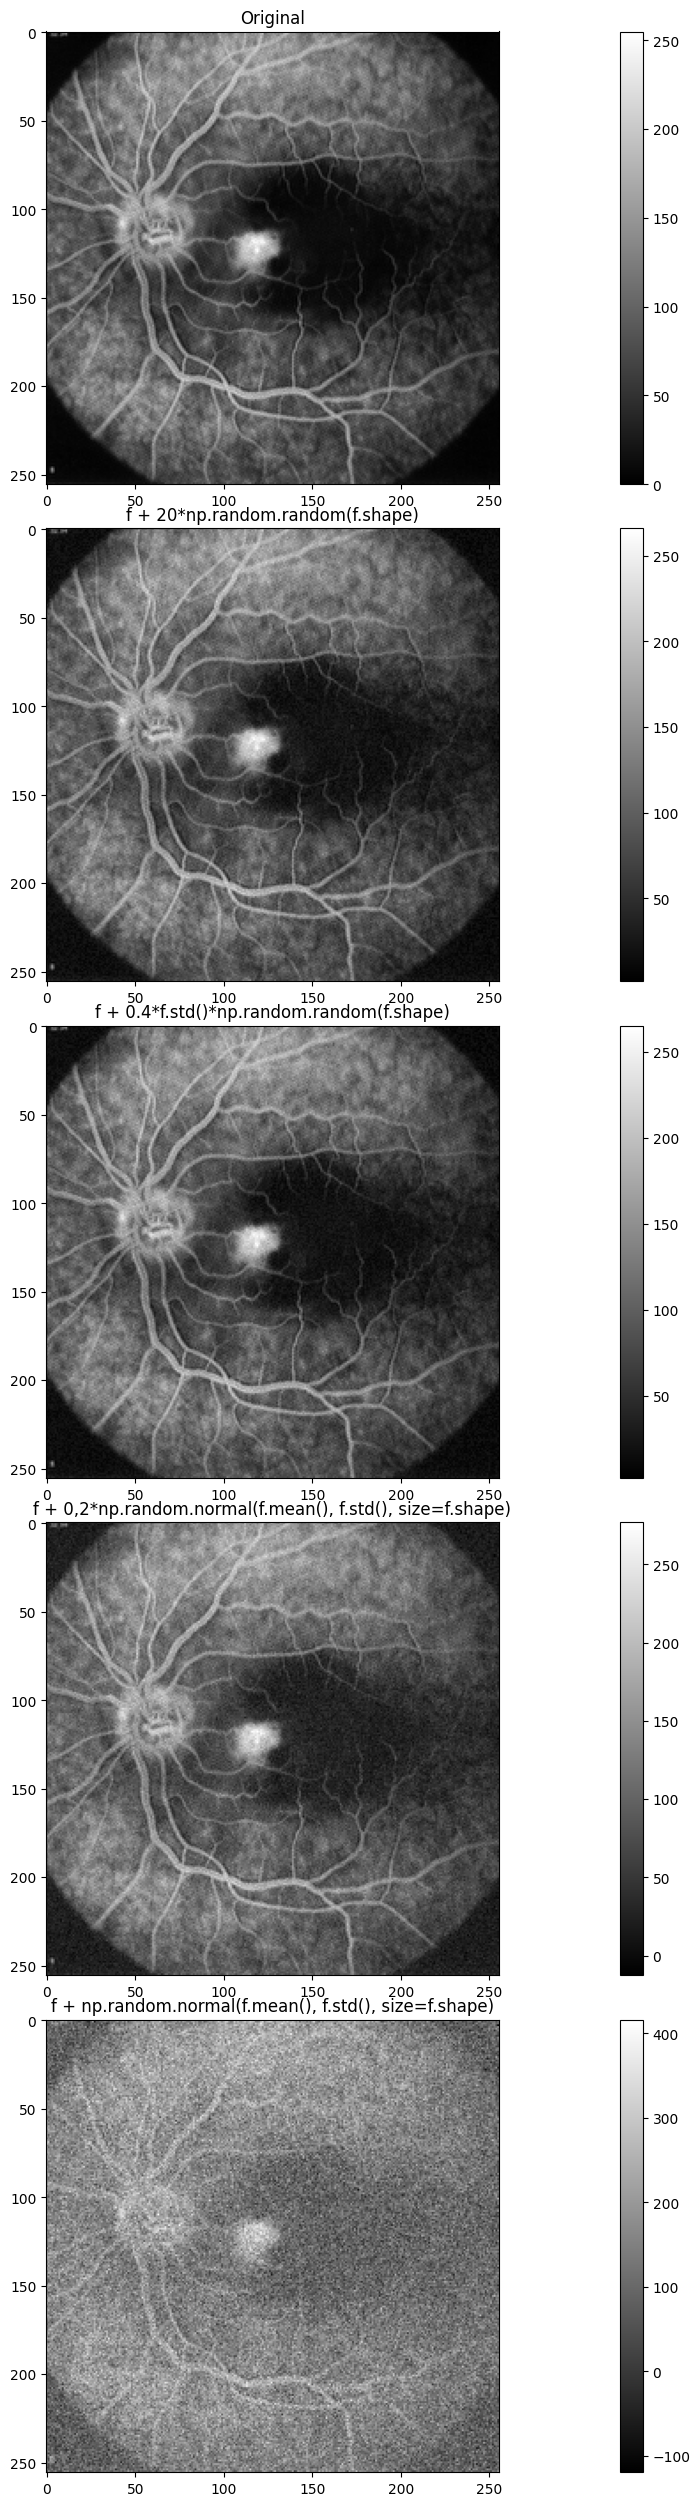

In [ ]:
# Ruído

noisy = f + 20*np.random.random(f.shape)
noisy2 = f + 0.4*f.std()*np.random.random(f.shape)
noisy3 = f + np.random.normal(f.mean(), f.std(), size=f.shape)
noisy4 = f + 0.2*np.random.normal(f.mean(), f.std(), size=f.shape)

fig, axs = plt.subplots(5,1, figsize=(25, 25))
plt.tight_layout() 

plt.subplot(511)
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.title('Original')

plt.subplot(512)
plt.imshow(noisy,cmap='gray')
plt.colorbar()
plt.title('f + 20*np.random.random(f.shape)')

plt.subplot(513)
plt.imshow(noisy2,cmap='gray')
plt.colorbar()
plt.title('f + 0.4*f.std()*np.random.random(f.shape)')

plt.subplot(514)
plt.imshow(noisy4,cmap='gray')
plt.colorbar()
plt.title('f + 0,2*np.random.normal(f.mean(), f.std(), size=f.shape)')

plt.subplot(515)
plt.imshow(noisy3,cmap='gray')
plt.colorbar()
plt.title('f + np.random.normal(f.mean(), f.std(), size=f.shape)')

# Show the plot
plt.show()



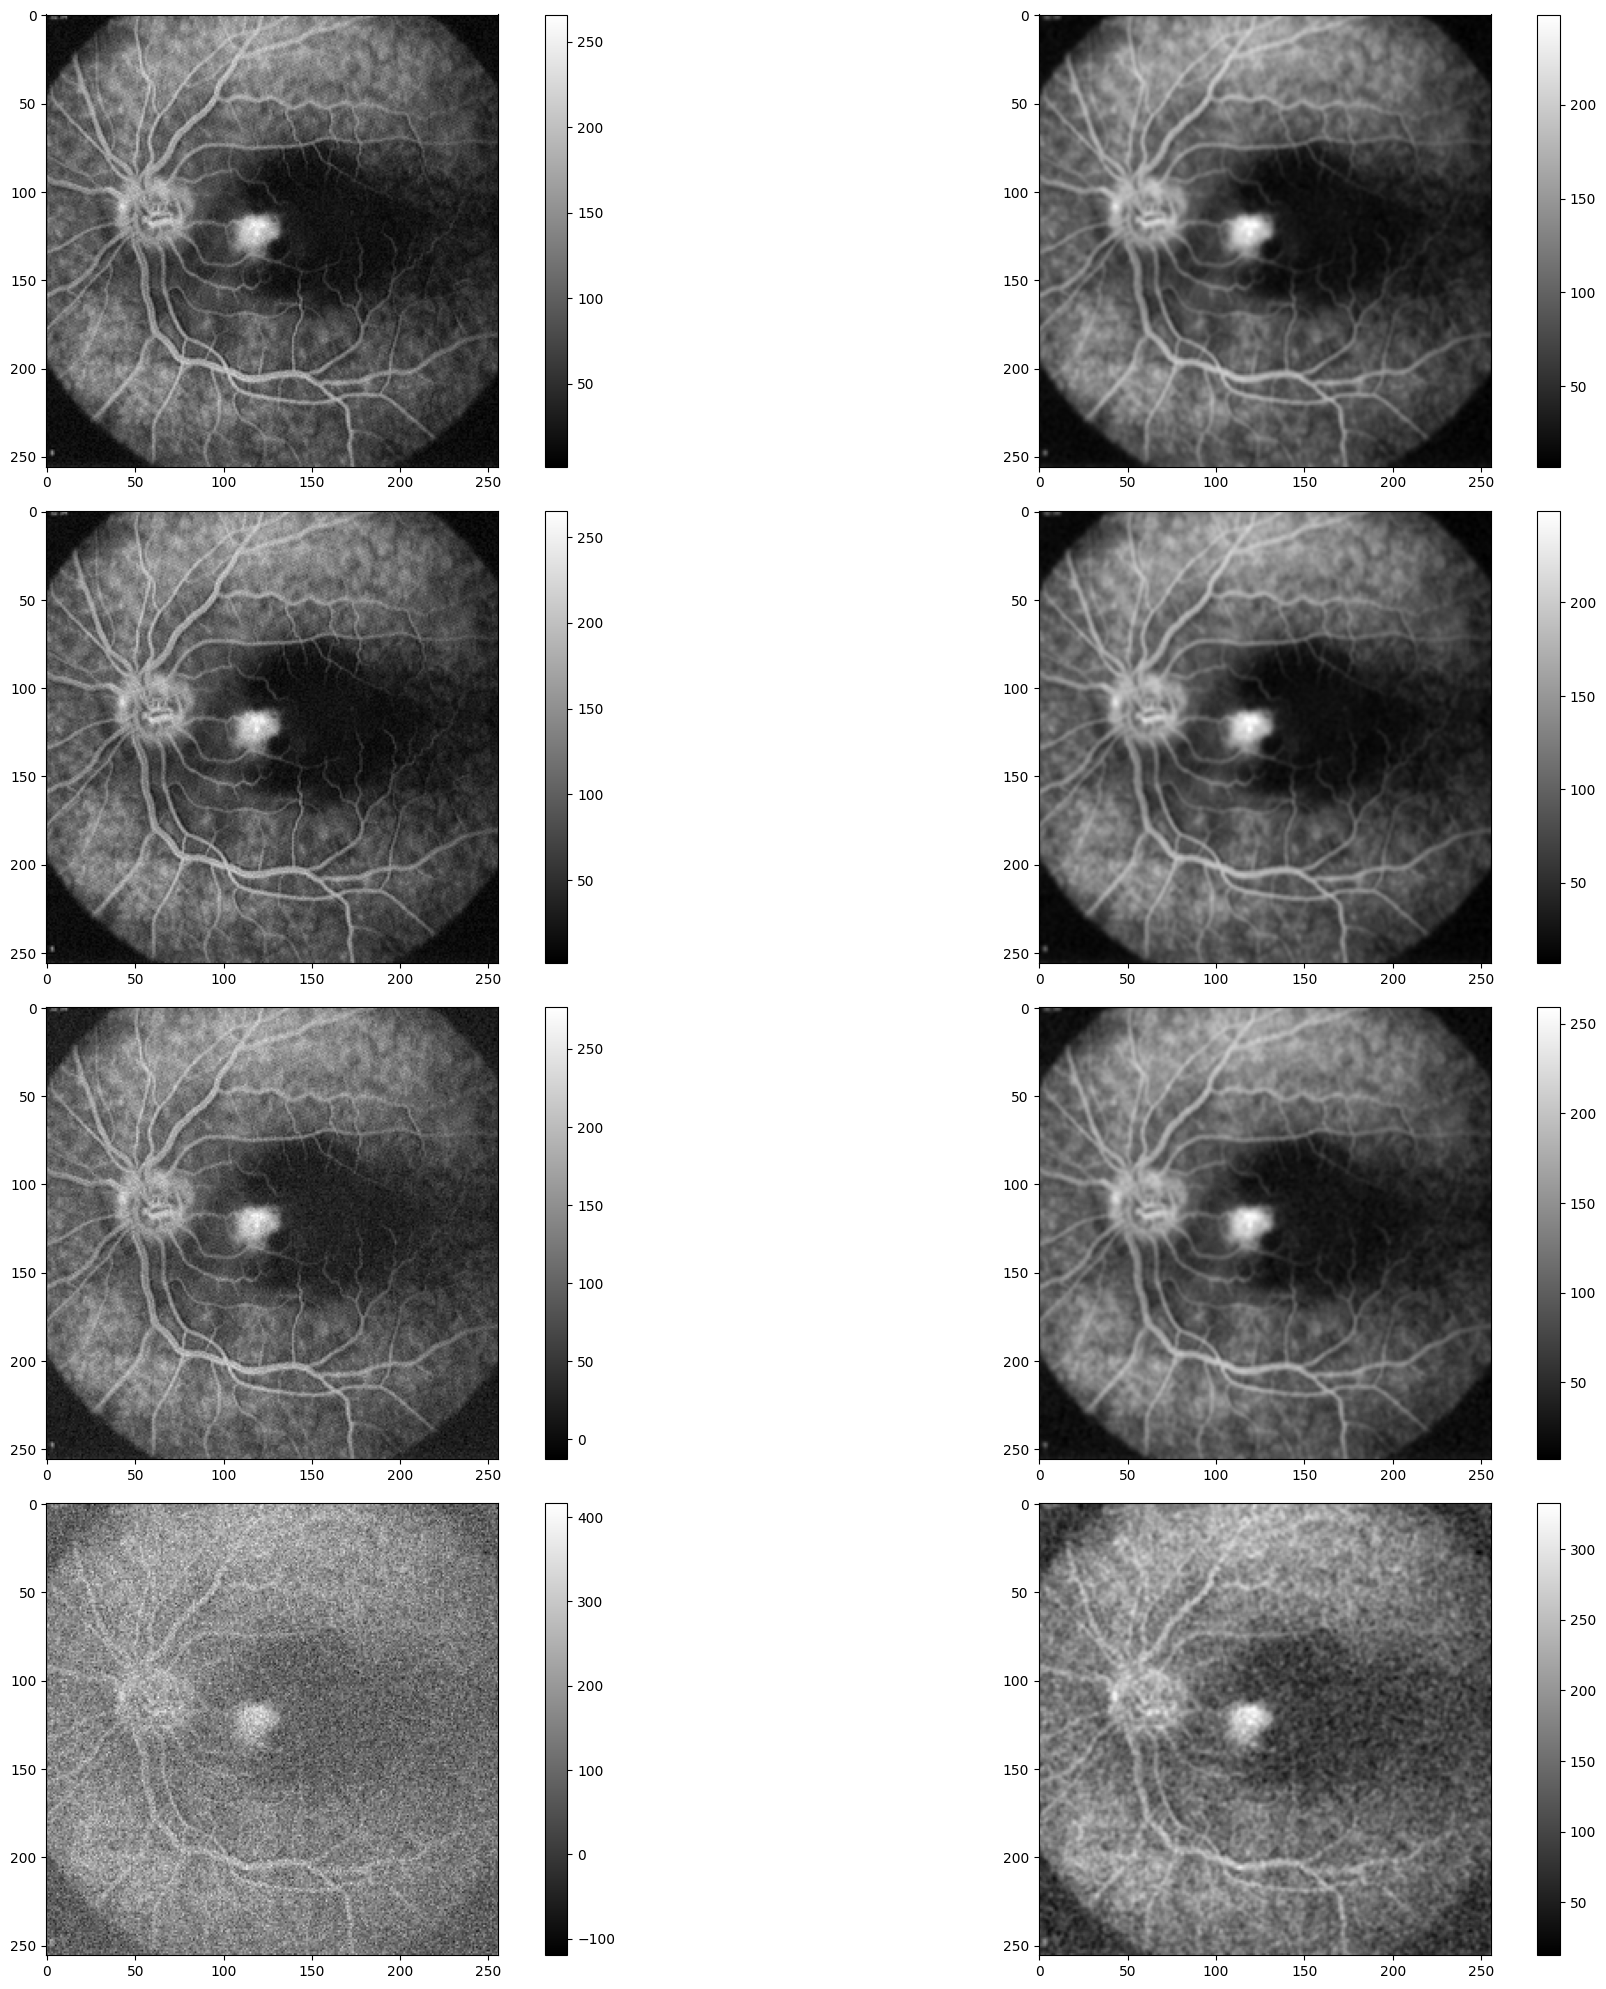

In [ ]:
# normalizando o filtro gaussiano
gnorm = 1/sum(sum(g))*g

# filtrando a imagem ruidosa com o filtro gaussiano 2D
f_no_noise = convolve(noisy,gnorm)
f_no_noise2 = convolve(noisy2,gnorm)
f_no_noise4 = convolve(noisy4,gnorm)
f_no_noise3 = convolve(noisy3,gnorm)

fig, axs = plt.subplots(4,2, figsize=(20, 20))
plt.tight_layout() 

plt.subplot(421)
plt.imshow(noisy, cmap='gray')
plt.colorbar()

plt.subplot(422)
plt.imshow(f_no_noise,cmap='gray')
plt.colorbar()

plt.subplot(423)
plt.imshow(noisy2, cmap='gray')
plt.colorbar()

plt.subplot(424)
plt.imshow(f_no_noise2,cmap='gray')
plt.colorbar()

plt.subplot(425)
plt.imshow(noisy4, cmap='gray')
plt.colorbar()

plt.subplot(426)
plt.imshow(f_no_noise4,cmap='gray')
plt.colorbar()

plt.subplot(427)
plt.imshow(noisy3, cmap='gray')
plt.colorbar()

plt.subplot(428)
plt.imshow(f_no_noise3,cmap='gray')
plt.colorbar()

É possível ver que o filtro consegue remover parte do ruído, mas que também acaba borrando um pouco a imagem.

## Exercício 4.3 - Filtro de Sobel e detecção de bordas

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [ ]:
import numpy as np

Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)

Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### Exercício 4.3.1 - Visualizando as bordas verticais e horizontais em 2 imagens separadas

Para detectar bordas de uma imagem usando o Filtro de Sobel, precisamos fazer a filtragem da imagem usando tanto a máscara vertical, quanto a horizontal. No final, acabaremos com 2 imagens resultantes, cada uma reforçando as bordas verticais e horizontais, respectivamente. 

Experimente filtrar a imagem da retina com os Filtros de Sobel vertical e horizontal e visualize o resultado. Você deve obter uma imagem fitrada pelo Filtro de Sobel vertical - **fv** - e uma imagem filtrada pelo Filtro de Sobel horizontal - **fh**.

In [ ]:
img1 = mpimg.imread(path+'retina.tif')
img2 = mpimg.imread(path+'cameraman.tif')

Text(0.5, 1.0, 'Horizontal')

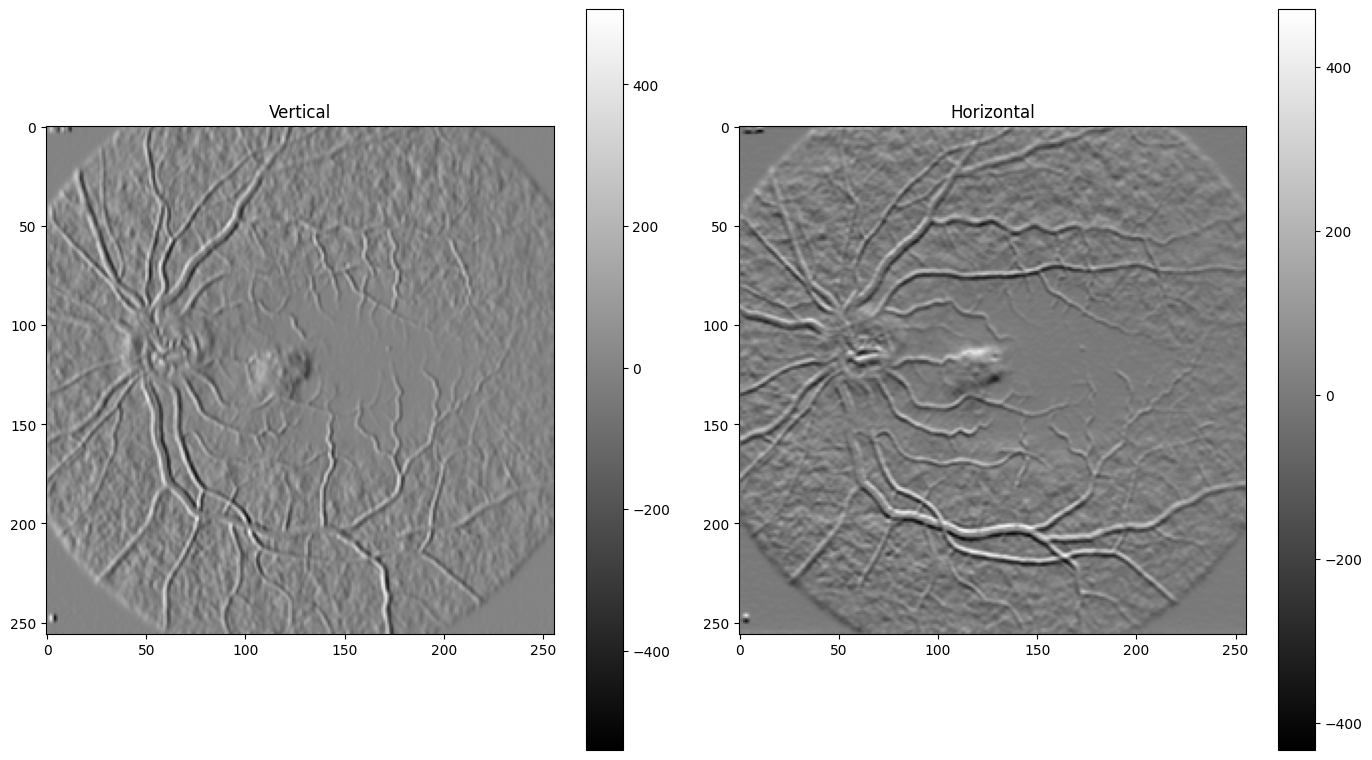

In [ ]:
# Filtrando a imagem f pelos filtros vertical e horizontal de Sobel
f = mpimg.imread(path+'retina.tif')


f1 = f.astype(float)
fv = convolve(f1,Sv)
fh = convolve(f1,Sh)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fv, cmap='gray')
plt.colorbar()
plt.title('Vertical')

plt.subplot(122)
plt.imshow(fh,cmap='gray')
plt.colorbar()
plt.title('Horizontal')

A imagem aparece cinza, porque há bordas positivas e negativas. Para ver todas as bordas positivas, é preciso fazer o absoluto da imagem.

Text(0.5, 1.0, 'Horizontal')

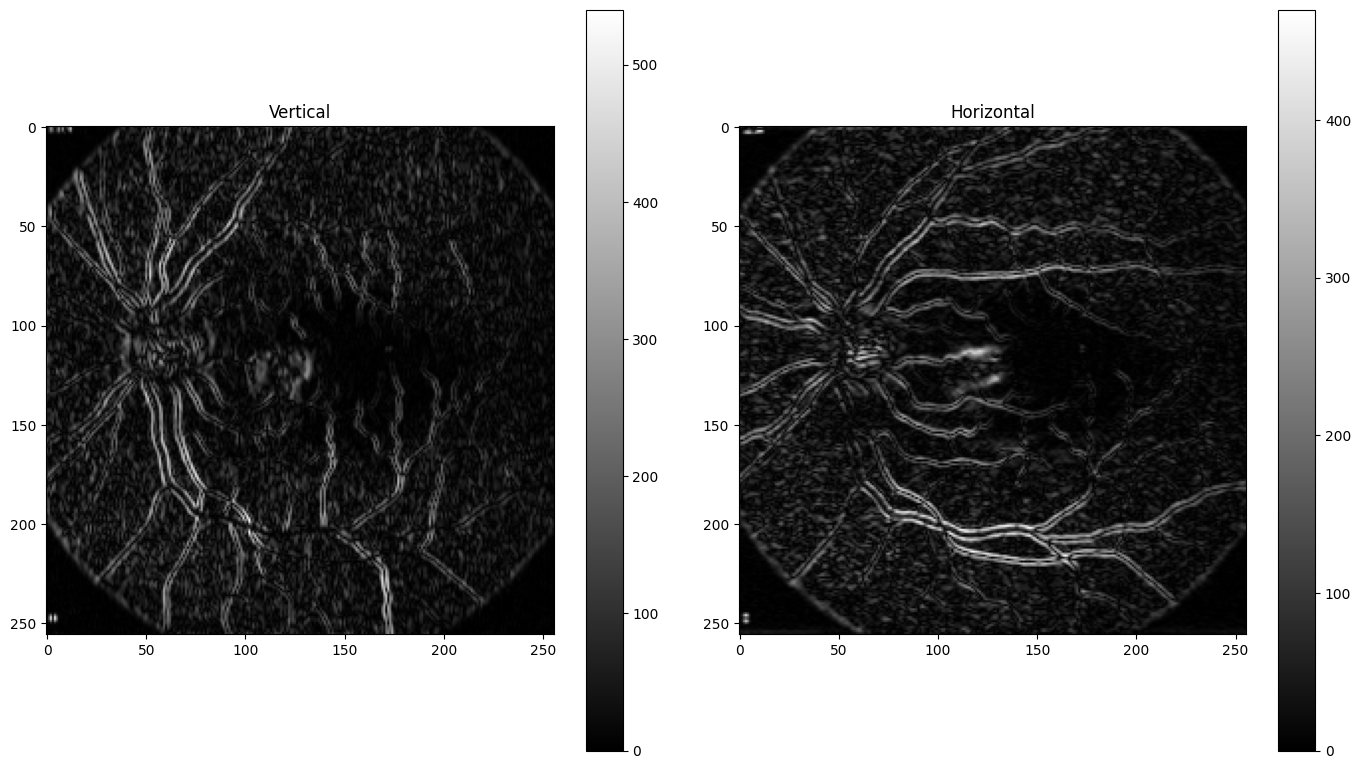

In [ ]:
# Adquirindo absoluto da imagem para visualizar bordas positivas

fvv = np.abs(fv)
fhh = np.abs(fh)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fvv, cmap='gray')
plt.colorbar()
plt.title('Vertical')

plt.subplot(122)
plt.imshow(fhh,cmap='gray')
plt.colorbar()
plt.title('Horizontal')


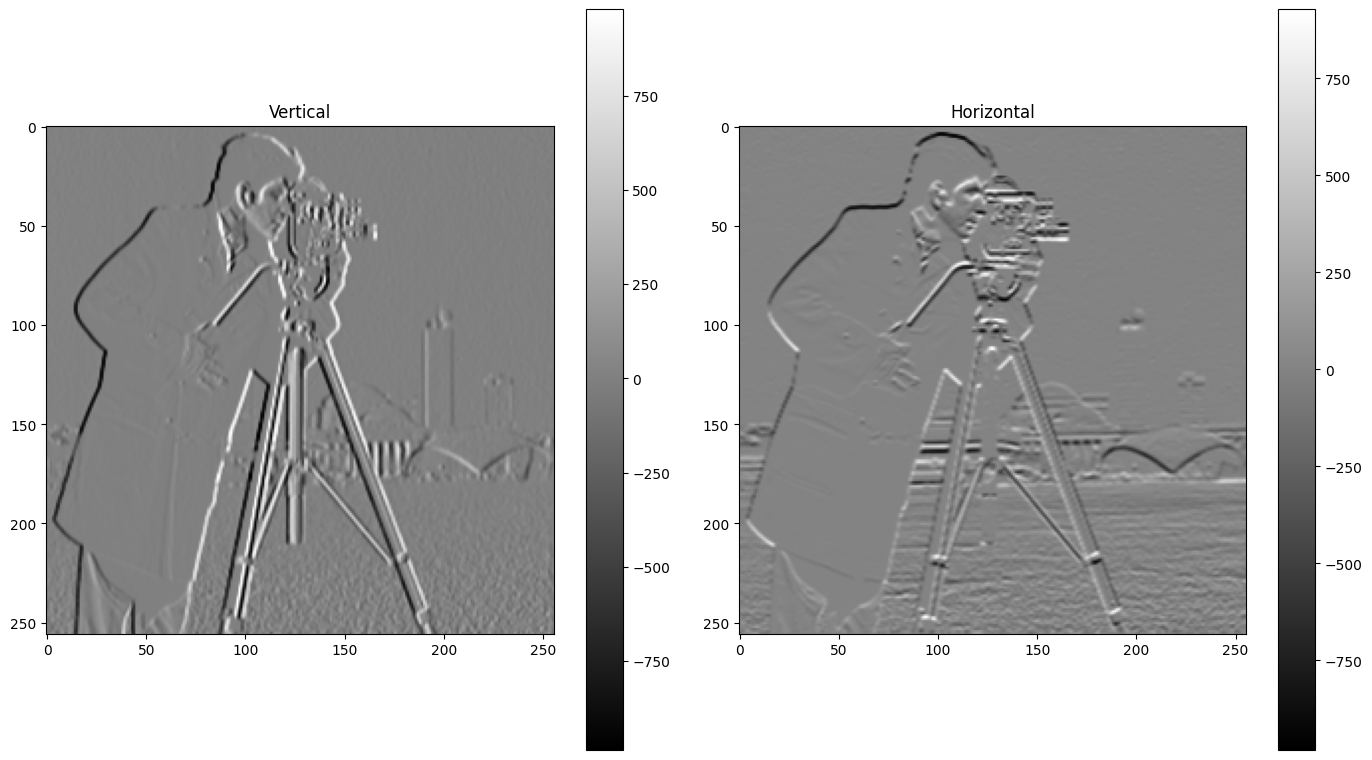

In [ ]:
f = mpimg.imread(path+'cameraman.tif')
f1 = f.astype(float)
fv2 = convolve(f1,Sv)
fh2 = convolve(f1,Sh)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fv2, cmap='gray')
plt.title('Vertical')
plt.colorbar()

plt.subplot(122)
plt.imshow(fh2,cmap='gray')
plt.title('Horizontal')
plt.colorbar()


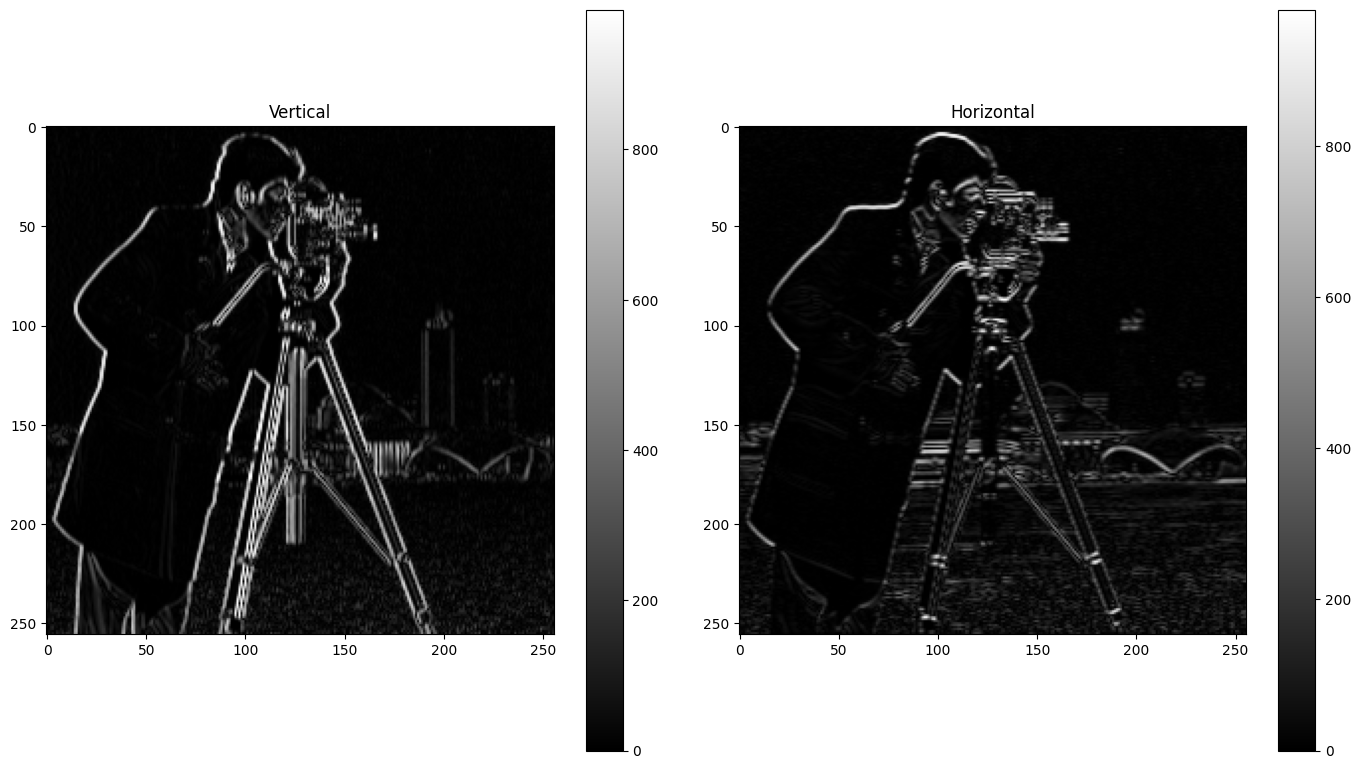

In [ ]:
# Adquirindo absoluto da imagem para visualizar bordas positivas

fvv2 = np.abs(fv2)
fhh2 = np.abs(fh2)

fig, axs = plt.subplots(1,2, figsize=(14, 8))
plt.tight_layout() 

plt.subplot(121)
plt.imshow(fvv2, cmap='gray')
plt.title('Vertical')
plt.colorbar()


plt.subplot(122)
plt.imshow(fhh2,cmap='gray')
plt.title('Horizontal')
plt.colorbar()


### Exercício 4.3.2 - Visualizando todas as bordas em uma única imagem

Para visualizar o resultado das 2 filtragens em uma única imagem, utilizamos a magnitude de Sobel. A função MagSobel a ser implementada possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical. Crie esta função e visualize a Magnitude Sobel das imagens geradas no item 3.1 (fv e fh).

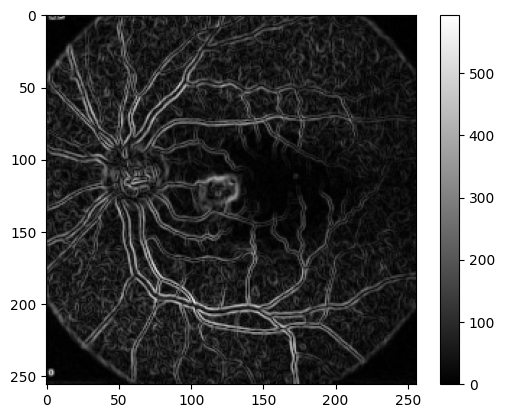

In [ ]:
MagSobel = np.sqrt(fv*fv+fh*fh)
plt.imshow(MagSobel,cmap='gray')
plt.colorbar()


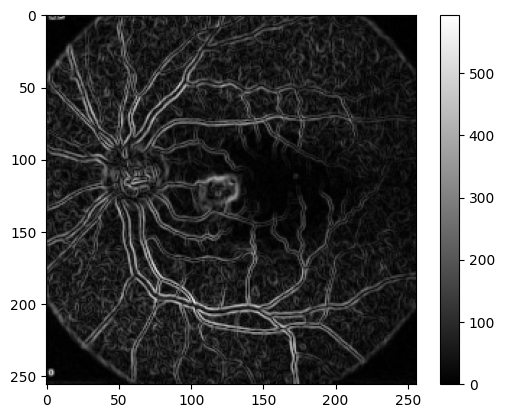

In [ ]:
MagSobel = np.sqrt(fvv*fvv+fhh*fhh)
plt.imshow(MagSobel,cmap='gray')
plt.colorbar()


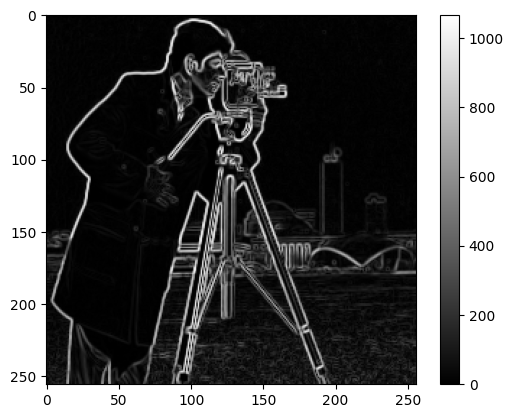

In [ ]:
MagSobel = np.sqrt(fv2*fv2+fh2*fh2)
plt.imshow(MagSobel,cmap='gray')
plt.colorbar()


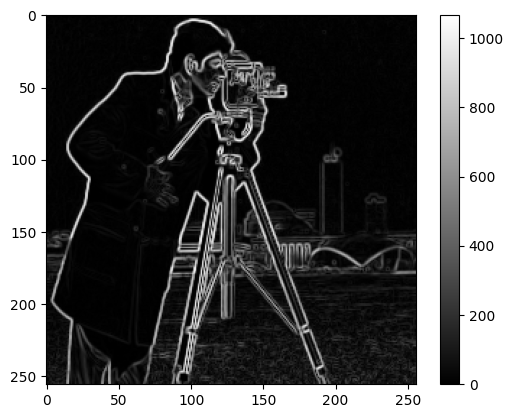

In [ ]:
MagSobel = np.sqrt(fvv2*fvv2+fhh2*fhh2)
plt.imshow(MagSobel,cmap='gray')
plt.colorbar()


# Referências

- [Filtragem no domínio espacial](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/07_Filtragem_no_dominio_espacial.ipynb)